In [1]:
import pandas as pd

In [2]:
t = pd.read_csv("../assets/trucks.csv")

In [3]:
t.head(5)

,truck,city,state,lat,lng
0,Hartford Plastics Incartford,Florence,AL,34.799810,-87.677251
1,Beyond Landscape & Design Llcilsonville,Fremont,CA,37.548270,-121.988572
2,Empire Of Dirt Llcquality,Hampden,ME,44.744542,-68.837044
3,James Haas Al Haas Shelly Haasairfield,North East,MD,39.600113,-75.941333
4,Ibrahim Chimandalpharetta,Toledo,OH,41.663938,-83.555212


In [4]:
c = pd.read_csv("../assets/cargo.csv")
c

,product,origin_city,origin_state,origin_lat,origin_lng,destination_city,destination_state,destination_lat,destination_lng
0,Light bulbs,Sikeston,MO,36.876719,-89.587858,Grapevine,TX,32.934292,-97.078065
1,Recyclables,Christiansburg,VA,37.129852,-80.408939,Apopka,FL,28.693408,-81.532215
2,Apples,Columbus,OH,39.961176,-82.998794,Woodland,CA,38.678516,-121.773297
3,Wood,Hebron,KY,39.066147,-84.703189,Jefferson,LA,29.966037,-90.153130
4,Cell phones,Hickory,NC,35.734454,-81.344457,La Pine,OR,43.670399,-121.503636
5,Wood,Northfield,MN,44.458298,-93.161604,Waukegan,IL,42.363633,-87.844794
6,Oranges,Fort Madison,IA,40.629763,-91.314535,Ottawa,IL,41.345589,-88.842577


In [5]:
import json
cargos = json.loads(c.to_json(orient='records'))
cargos[:1]

[{'product': 'Light bulbs',
  'origin_city': 'Sikeston',
  'origin_state': 'MO',
  'origin_lat': 36.876719,
  'origin_lng': -89.5878579,
  'destination_city': 'Grapevine',
  'destination_state': 'TX',
  'destination_lat': 32.9342919,
  'destination_lng': -97.0780654}]

In [6]:
trucks = json.loads(t.to_json(orient='records'))
print(f'cargos={len(cargos)} trucks={len(trucks)}')

cargos=7 trucks=44


In [7]:
cargo_locs = [(i['origin_lat'], i['origin_lng']) for i in cargos]
truck_locs = [(i['lat'], i['lng']) for i in trucks]
print(cargo_locs[:3])
print(truck_locs[:3])

[(36.876719, -89.5878579), (37.1298517, -80.4089389), (39.9611755, -82.9987942)]
[(34.79981, -87.677251), (37.5482697, -121.9885719), (44.7445421, -68.8370436)]


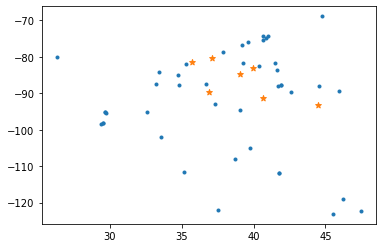

In [8]:
from pylab import *

y = [i[1] for i in truck_locs]
x = [i[0] for i in truck_locs]

scatter(x,y, marker='.')

y = [i[1] for i in cargo_locs]
x = [i[0] for i in cargo_locs]

scatter(x,y, marker='*')


In [9]:
from math import sqrt
get_distance = lambda p1, p2: sqrt((p2[0] - p1[0]) **2  + (p2[1] - p1[1])**2 )


In [10]:
assert get_distance((-3, -11), (2, 1)) == 13

In [11]:
busy_trucks = []
for p1 in cargo_locs:
    shortest_distance = float('inf')
    cargo, truck = None, None
    for p2 in truck_locs:
        if p2 in busy_trucks:
            continue

        if get_distance(p1,p2) < shortest_distance:
            shortest_distance = get_distance(p1,p2)
            cargo, truck = p1, p2
            busy_trucks.append(p2)

    print(f' truck={truck}, short={shortest_distance}, cargo={cargo}')

 truck=(36.6634467, -87.4773902), short=2.121216393178825, cargo=(36.876719, -89.5878579)
 truck=(37.8901411, -78.7047401), short=1.8661011552629718, cargo=(37.1298517, -80.4089389)
 truck=(40.3933956, -82.4857181), short=0.6708660814463809, cargo=(39.9611755, -82.9987942)
 truck=(39.244853, -81.6637765), short=3.044661375645079, cargo=(39.0661472, -84.7031888)
 truck=(33.4473361, -84.1468616), short=3.6172333674110266, cargo=(35.7344538, -81.3444573)
 truck=(42.6011194, -89.6384532), short=3.9826756114634576, cargo=(44.4582983, -93.161604)
 truck=(37.338658, -92.9071209), short=3.656187167362734, cargo=(40.6297634, -91.314535)


In [24]:
from geopy.distance import geodesic
geodesic((40.6297634,-91.31453499999999),(41.3455892,-88.8425769))

Distance(222.67908026526436)

In [25]:
from geopy.distance import geodesic
a = geodesic((44.4582983,-93.161604),(43.67039949999999,-121.503636))
b = geodesic((36.876719,-89.5878579),(43.67039949999999,-121.503636))
c = a + b
print(c)

5059.192029128326 km


In [13]:
busy_trucks = []
result = []
for cargo in cargos:
    shortest_distance = float('inf')
    c, t = None, None
    for truck in trucks:
        if truck in busy_trucks:
            continue
        p1 = (cargo['origin_lat'], cargo['origin_lng'])
        p2 = (truck['lat'], truck['lng'])
        if geodesic(p1,p2) < shortest_distance:
            shortest_distance = geodesic(p1,p2)
            c = cargo['product']
            t = truck['truck']
            busy_trucks.append(truck)
    data = {c:t, 'distance': shortest_distance}
    print(data)


{'Light bulbs': 'Viking Products Of Austin Incustin', 'distance': Distance(189.89691067032416)}
{'Recyclables': 'Ricardo Juradoacramento', 'distance': Distance(172.68942165355216)}
{'Apples': "Kjellberg'S Carpet Oneuffalo", 'distance': Distance(64.90743181300715)}
{'Wood': 'Wisebuys Stores Incouverneur', 'distance': Distance(263.451566732034)}
{'Cell phones': 'Jeffrey A Shepardypsum', 'distance': Distance(346.86649006745955)}
{'Wood': 'Gary Lee Wilcoxpencer', 'distance': Distance(347.8845182874006)}
{'Oranges': 'Fish-Bones Towingew York', 'distance': Distance(259.70665525268134)}


In [14]:
import geopandas as gpd
import numpy as np
import pandas as pd

from scipy.spatial import cKDTree
from shapely.geometry import Point

td = [[i['truck'],Point(i['lat'], i['lng'])] for i in trucks]
tc = [[i['product'],Point(i['origin_lat'], i['origin_lng'])] for i in cargos]

gpd1 = gpd.GeoDataFrame(td, columns=['Truck', 'geometry'])
gpd2 = gpd.GeoDataFrame(tc, columns=['Cargo', 'geometry'])

def get_nearest(gdA, gdB):
    nA = np.array(list(gdA.geometry.apply(lambda x: (x.x, x.y)))) # Cargo
    nB = np.array(list(gdB.geometry.apply(lambda x: (x.x, x.y)))) # Truks
    btree = cKDTree(nB)
    dist, idx = btree.query(nA, k=1)
    gdf = pd.concat([
        gdA.reset_index(drop=True), 
        gdB.loc[idx, gdB.columns != 'geometry'].reset_index(drop=True),
        pd.Series(dist, name='distance')
    ], axis=1)
    return gdf

get_nearest(gpd2, gpd1)


,Cargo,geometry,Truck,distance
0,Light bulbs,POINT (36.877 -89.588),Viking Products Of Austin Incustin,2.121216
1,Recyclables,POINT (37.130 -80.409),Ricardo Juradoacramento,1.866101
2,Apples,POINT (39.961 -82.999),Kjellberg'S Carpet Oneuffalo,0.670866
3,Wood,POINT (39.066 -84.703),Kjellberg'S Carpet Oneuffalo,2.584331
4,Cell phones,POINT (35.734 -81.344),Paul J Krez Companyorton Grove,0.656831
5,Wood,POINT (44.458 -93.162),Fish-Bones Towingew York,3.982676
6,Oranges,POINT (40.630 -91.315),Fish-Bones Towingew York,2.587565


In [16]:
class Node:
    def __init__(self, point=(None, None), name=None):
        self.point = point
        self.name = name
        self.left = None
        self.right = None

    @property
    def lat(self):
        return self.point[0]

    @property
    def lng(self):
        return self.point[1]
    
    
    @staticmethod
    def _get_axis(depth):
        return depth % 2

    @classmethod
    def build(cls, nodes, depth=0):
        length = len(nodes)
        if length == 0: 
            return None

        axis = cls._get_axis(depth)
        nodes.sort(key=lambda node: node.point[axis])

        node = nodes[length // 2]
        node.left = cls.build(nodes[: length // 2], depth + 1)
        node.right = cls.build(nodes[length // 2 + 1 :], depth + 1)

        return node

    @classmethod
    def get_closest(cls, root, target, mapping, depth=0):
        path = {}
        cls._get_closest_node(root, target, depth, path, mapping)
        ranking = sorted(path.keys(), key=lambda key: path[key])
        closest = ranking.pop(0)
        while mapping.get(closest) is not None:
            closest = ranking.pop(0)
        mapping[closest] = target
        return path, closest

    @classmethod
    def _get_closest_node(cls, root, target, depth, path, mapping):
        if root is None: 
            return

        axis = cls._get_axis(depth)
        next_node, opposite_node = cls._decide_next_node(root, target, axis)
        
        closest_node = lambda node: cls._get_closest_node(node, target, depth + 1, path, mapping)
        decide_best = lambda node: cls._decide_closer(target, closest, node)
        best_distance = lambda best: geodesic(target.point, best.point)
        
        closest = closest_node(next_node)
        best = decide_best(root)
        
        if best_distance(best) > abs(target.point[axis] - root.point[axis]):
            closest = closest_node(opposite_node)
            best = decide_best(best)

        if mapping.get(best) is not None:
            return

        path[best] = best_distance(best)
        return best  

    @staticmethod
    def _decide_next_node(root, target, axis):
        if target.point[axis] < root.point[axis]:
            return root.left, root.right
        return root.right, root.left

    @classmethod
    def _decide_closer(cls, target, point_a, point_b):
        if point_a is None:
            return point_b
        elif point_b is None:
            return point_a

        distance_a = geodesic(target.point, point_a.point)
        distance_b = geodesic(target.point, point_b.point)

        return point_a if distance_a < distance_b else point_b


    def __repr__(self):
        return f"<name:{self.name}, lat:{self.lat}, lng:{self.lng}>"


In [17]:
class KdTree:
    def __init__(self, nodes):
        self.root = Node.build(nodes)
        self.mapping = {}

    def get_closest(self, target):
        return Node.get_closest(self.root, target, self.mapping)


In [33]:
class SearchTree:
    def __init__(self, cargos, trucks):
        self.cargo_nodes, self.truck_nodes = self.build_nodes(cargos, trucks, Node)
        self.tree = None

    @staticmethod
    def build_nodes(cargos, trucks, node_class):
        cargo_nodes = [node_class((item['origin_lat'], item['origin_lng']), item['product']) for item in cargos]
        truck_nodes = [node_class((item['lat'], item['lng']), item['truck']) for item in trucks]
        return cargo_nodes, truck_nodes

    def build(self):
        self.tree = KdTree(self.truck_nodes)

    def truck_assignment(self):
        response = []
        for cargo in self.cargo_nodes:
            path, truck = self.tree.get_closest(cargo)
            response.append({
                "cargo": cargo.name, 
                "truck": truck.name, 
                "distance": round(path[truck].miles, 2)
            })

        return response


In [34]:
tree = SearchTree(cargos, trucks)
tree.build()
tree.truck_assignment()

[{'cargo': 'Light bulbs',
  'truck': 'Viking Products Of Austin Incustin',
  'distance': 118.0},
 {'cargo': 'Recyclables',
  'truck': 'Ricardo Juradoacramento',
  'distance': 107.3},
 {'cargo': 'Apples',
  'truck': "Kjellberg'S Carpet Oneuffalo",
  'distance': 40.33},
 {'cargo': 'Wood', 'truck': 'Wisebuys Stores Incouverneur', 'distance': 163.7},
 {'cargo': 'Cell phones',
  'truck': 'Paul J Krez Companyorton Grove',
  'distance': 40.29},
 {'cargo': 'Wood', 'truck': 'Gary Lee Wilcoxpencer', 'distance': 216.17},
 {'cargo': 'Oranges', 'truck': 'Fish-Bones Towingew York', 'distance': 161.37}]

In [20]:
[
    {'cargo': 'Light bulbs', 'truck': 'Viking Products Of Austin Incustin'}, 
    {'cargo': 'Recyclables', 'truck': 'Ricardo Juradoacramento'}, 
    {'cargo': 'Apples', 'truck': "Kjellberg'S Carpet Oneuffalo"}, 
    {'cargo': 'Wood', 'truck': 'Wisebuys Stores Incouverneur'}, 
    {'cargo': 'Cell phones', 'truck': 'Paul J Krez Companyorton Grove'}, 
    {'cargo': 'Wood', 'truck': 'Gary Lee Wilcoxpencer'}, 
    {'cargo': 'Oranges', 'truck': 'Fish-Bones Towingew York'}
]

[{'cargo': 'Light bulbs', 'truck': 'Viking Products Of Austin Incustin'},
 {'cargo': 'Recyclables', 'truck': 'Ricardo Juradoacramento'},
 {'cargo': 'Apples', 'truck': "Kjellberg'S Carpet Oneuffalo"},
 {'cargo': 'Wood', 'truck': 'Wisebuys Stores Incouverneur'},
 {'cargo': 'Cell phones', 'truck': 'Paul J Krez Companyorton Grove'},
 {'cargo': 'Wood', 'truck': 'Gary Lee Wilcoxpencer'},
 {'cargo': 'Oranges', 'truck': 'Fish-Bones Towingew York'}]

In [21]:
[
    {'cargo': (36.876719, -89.5878579), 'truck': (36.6634467, -87.4773902)}, 
    {'cargo': (37.1298517, -80.4089389), 'truck': (37.8901411, -78.7047401)}, 
    {'cargo': (39.9611755, -82.9987942), 'truck': (40.3933956, -82.4857181)}, 
    {'cargo': (39.0661472, -84.7031888), 'truck': (39.244853, -81.6637765)}, 
    {'cargo': (35.7344538, -81.3444573), 'truck': (35.3340108, -81.8651028)}, 
    {'cargo': (44.4582983, -93.161604), 'truck': (45.9171763, -89.2442988)}, 
    {'cargo': (40.6297634, -91.314535), 'truck': (42.6011194, -89.6384532)}
]


[{'cargo': (36.876719, -89.5878579), 'truck': (36.6634467, -87.4773902)},
 {'cargo': (37.1298517, -80.4089389), 'truck': (37.8901411, -78.7047401)},
 {'cargo': (39.9611755, -82.9987942), 'truck': (40.3933956, -82.4857181)},
 {'cargo': (39.0661472, -84.7031888), 'truck': (39.244853, -81.6637765)},
 {'cargo': (35.7344538, -81.3444573), 'truck': (35.3340108, -81.8651028)},
 {'cargo': (44.4582983, -93.161604), 'truck': (45.9171763, -89.2442988)},
 {'cargo': (40.6297634, -91.314535), 'truck': (42.6011194, -89.6384532)}]